In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('data/berkeley.csv')

# Problem 1 
Problem 1. Task: Exploring Simpson's Paradox with Berkeley Admissions Data Background: In 1973, UC Berkeley's graduate admissions data revealed a surprising statistical pattern. Your job is to investigate whether there was gender discrimination in the admissions process. The dataset berkeley.csv contains admission decisions (Admitted/Rejected) for male and female applicants to six graduate departments (A-F) at UC Berkeley in Fall 1973.

### Task 1
Overall admission rates: Calculate admission rates for males and females across all departments combined. Does there appear to be gender discrimination? Against whom?

Overall admission rates:
Sex
F    0.345753
M    0.442786
Name: Admission, dtype: float64


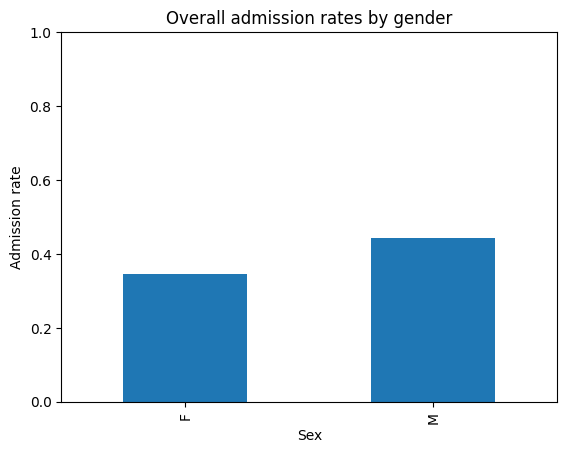

In [3]:
overall = (
    df.groupby("Sex")["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
)

print("Overall admission rates:")
print(overall)

overall.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Overall admission rates by gender")
plt.ylim(0, 1)
plt.show()

We can see that the overall admission rate for Males is 10% higher with sufficient data to suggest that there is gender discrimination against females.

### Task 2
Department-level rates: Calculate admission rates by gender for each department separately. In how many departments do males have higher rates? Females? Does this match part (1)? How do you explain any contradiction?


Major-level admission rates:
Sex           F         M
Major                    
A      0.824074  0.724956
B      0.680000  0.630357
C      0.338954  0.369231
D      0.349333  0.330935
E      0.239186  0.277487
F      0.073314  0.058981
Other  0.376911  0.409526

M higher: 3
F higher: 4


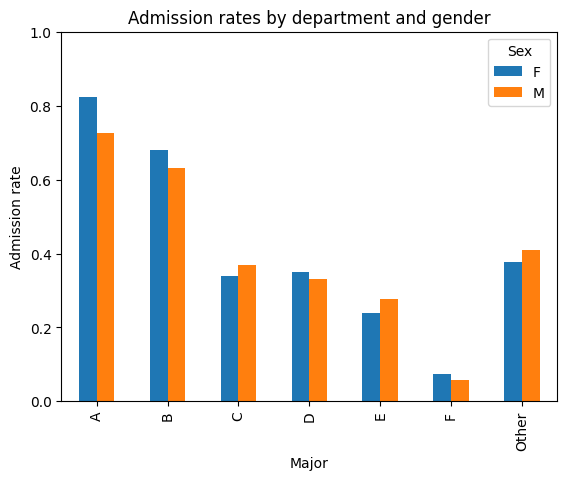

In [4]:
major_rates = (
    df.groupby(["Major", "Sex"])["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
    .unstack()
)

print("\nMajor-level admission rates:")
print(major_rates)

print("\nM higher:", (major_rates["M"] > major_rates["F"]).sum())
print("F higher:", (major_rates["F"] > major_rates["M"]).sum())

major_rates.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Admission rates by department and gender")
plt.ylim(0, 1)
plt.legend(title="Sex")
plt.show()

### Task 3: Applicant Counts and Department Selectivity

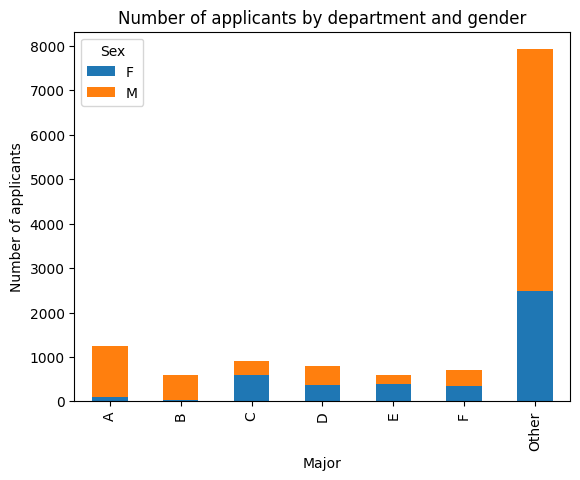

In [5]:
counts = df.groupby(["Major", "Sex"]).size().unstack()

counts.plot(kind="bar", stacked=True)
plt.ylabel("Number of applicants")
plt.title("Number of applicants by department and gender")
plt.show()

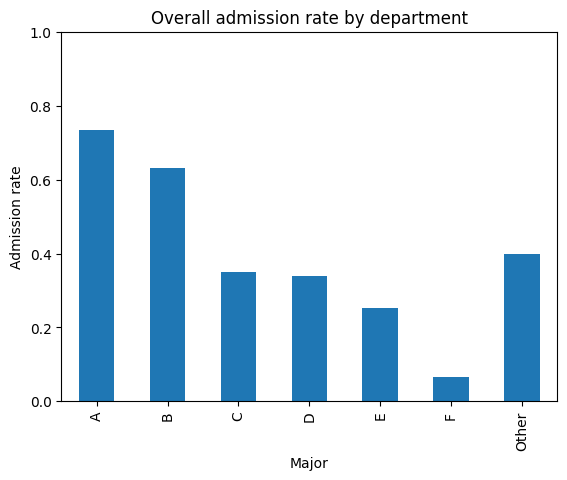

In [7]:
dept_selectivity = (
    df.groupby("Major")["Admission"]
    .apply(lambda x: (x == "Accepted").mean())
)

dept_selectivity.plot(kind="bar")
plt.ylabel("Admission rate")
plt.title("Overall admission rate by department")
plt.ylim(0, 1)
plt.show()